Regression MOdel Pipeline for  Predictive Maintenance
-------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.feature_selection import chi2,SelectKBest
from xgboost import XGBRegressor 
import time

In [ ]:
data = pd.read_csv("C:\\Users\\rajka\\OneDrive\\Desktop\\All Folders\\datasets\\regression_manufacturing_dataset.csv")
data

In [3]:
data.drop(columns = ['Unnamed: 0','UDI'],axis =1,inplace =True)

In [6]:
data

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,RUL
0,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,358.0
1,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,343.0
2,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,333.2
3,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,323.2
4,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,289.8
9996,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,275.0
9997,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,249.8
9998,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,234.6


Seprate input and target columns

In [ ]:
X = data.iloc[: , : 13]
y= data['RNF']

In [ ]:
X_train ,X_test , y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [18]:
numeric_list =[]
categoric_list =[]
for i in X_train.columns:
    if X_train[i].dtype == 'object':
         categoric_list.append(i)
    else :
         numeric_list.append(i)
numeric_list

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

#check data distribution 
------------------------------------------------------------------------------------------------------------------------------

In [33]:
#coorelation  for data features - target values
for i in numeric_list:
    corr = data[i].corr(data['RUL'])
    print(f'{i}:  {corr}')




Air temperature [K]:  -0.016332453579324068
Process temperature [K]:  -0.015050748620565336
Rotational speed [rpm]:  -0.05581476429383806
Torque [Nm]:  0.024403727784060747
Tool wear [min]:  -0.7506464716371093
Machine failure:  -0.10270328523690476
TWF:  -0.03808722110085717
HDF:  -0.06043099886573338
PWF:  -0.05486984736958853
OSF:  -0.05573792107503912
RNF:  -0.02444493923882895


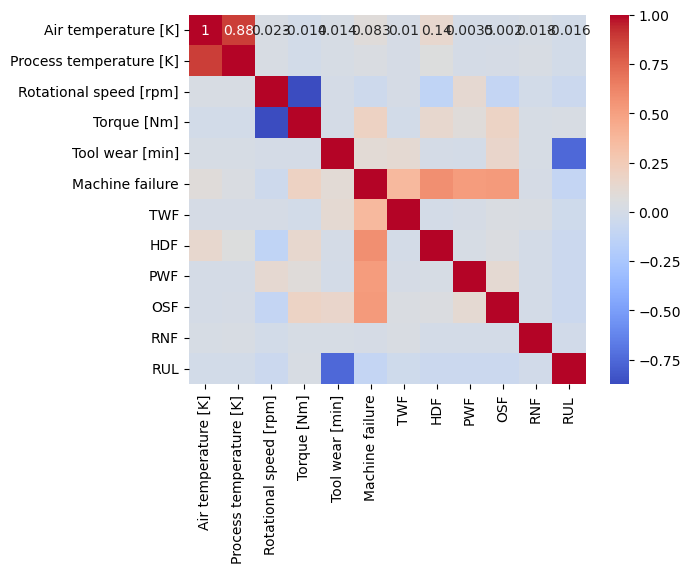

In [38]:
corr_matrix = data[numeric_list + ['RUL']].corr()
sb.heatmap(corr_matrix, annot = True, cmap ='coolwarm')
plt.show()

so above these values tells us most of the features are wekly related (non linear  or  irrelevent) to target -
so we must look upon any another models like random forest , decision _trees and xgboost
-------------------------------------------------------------------------------------------------------------------------------

C:\Users\rajka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

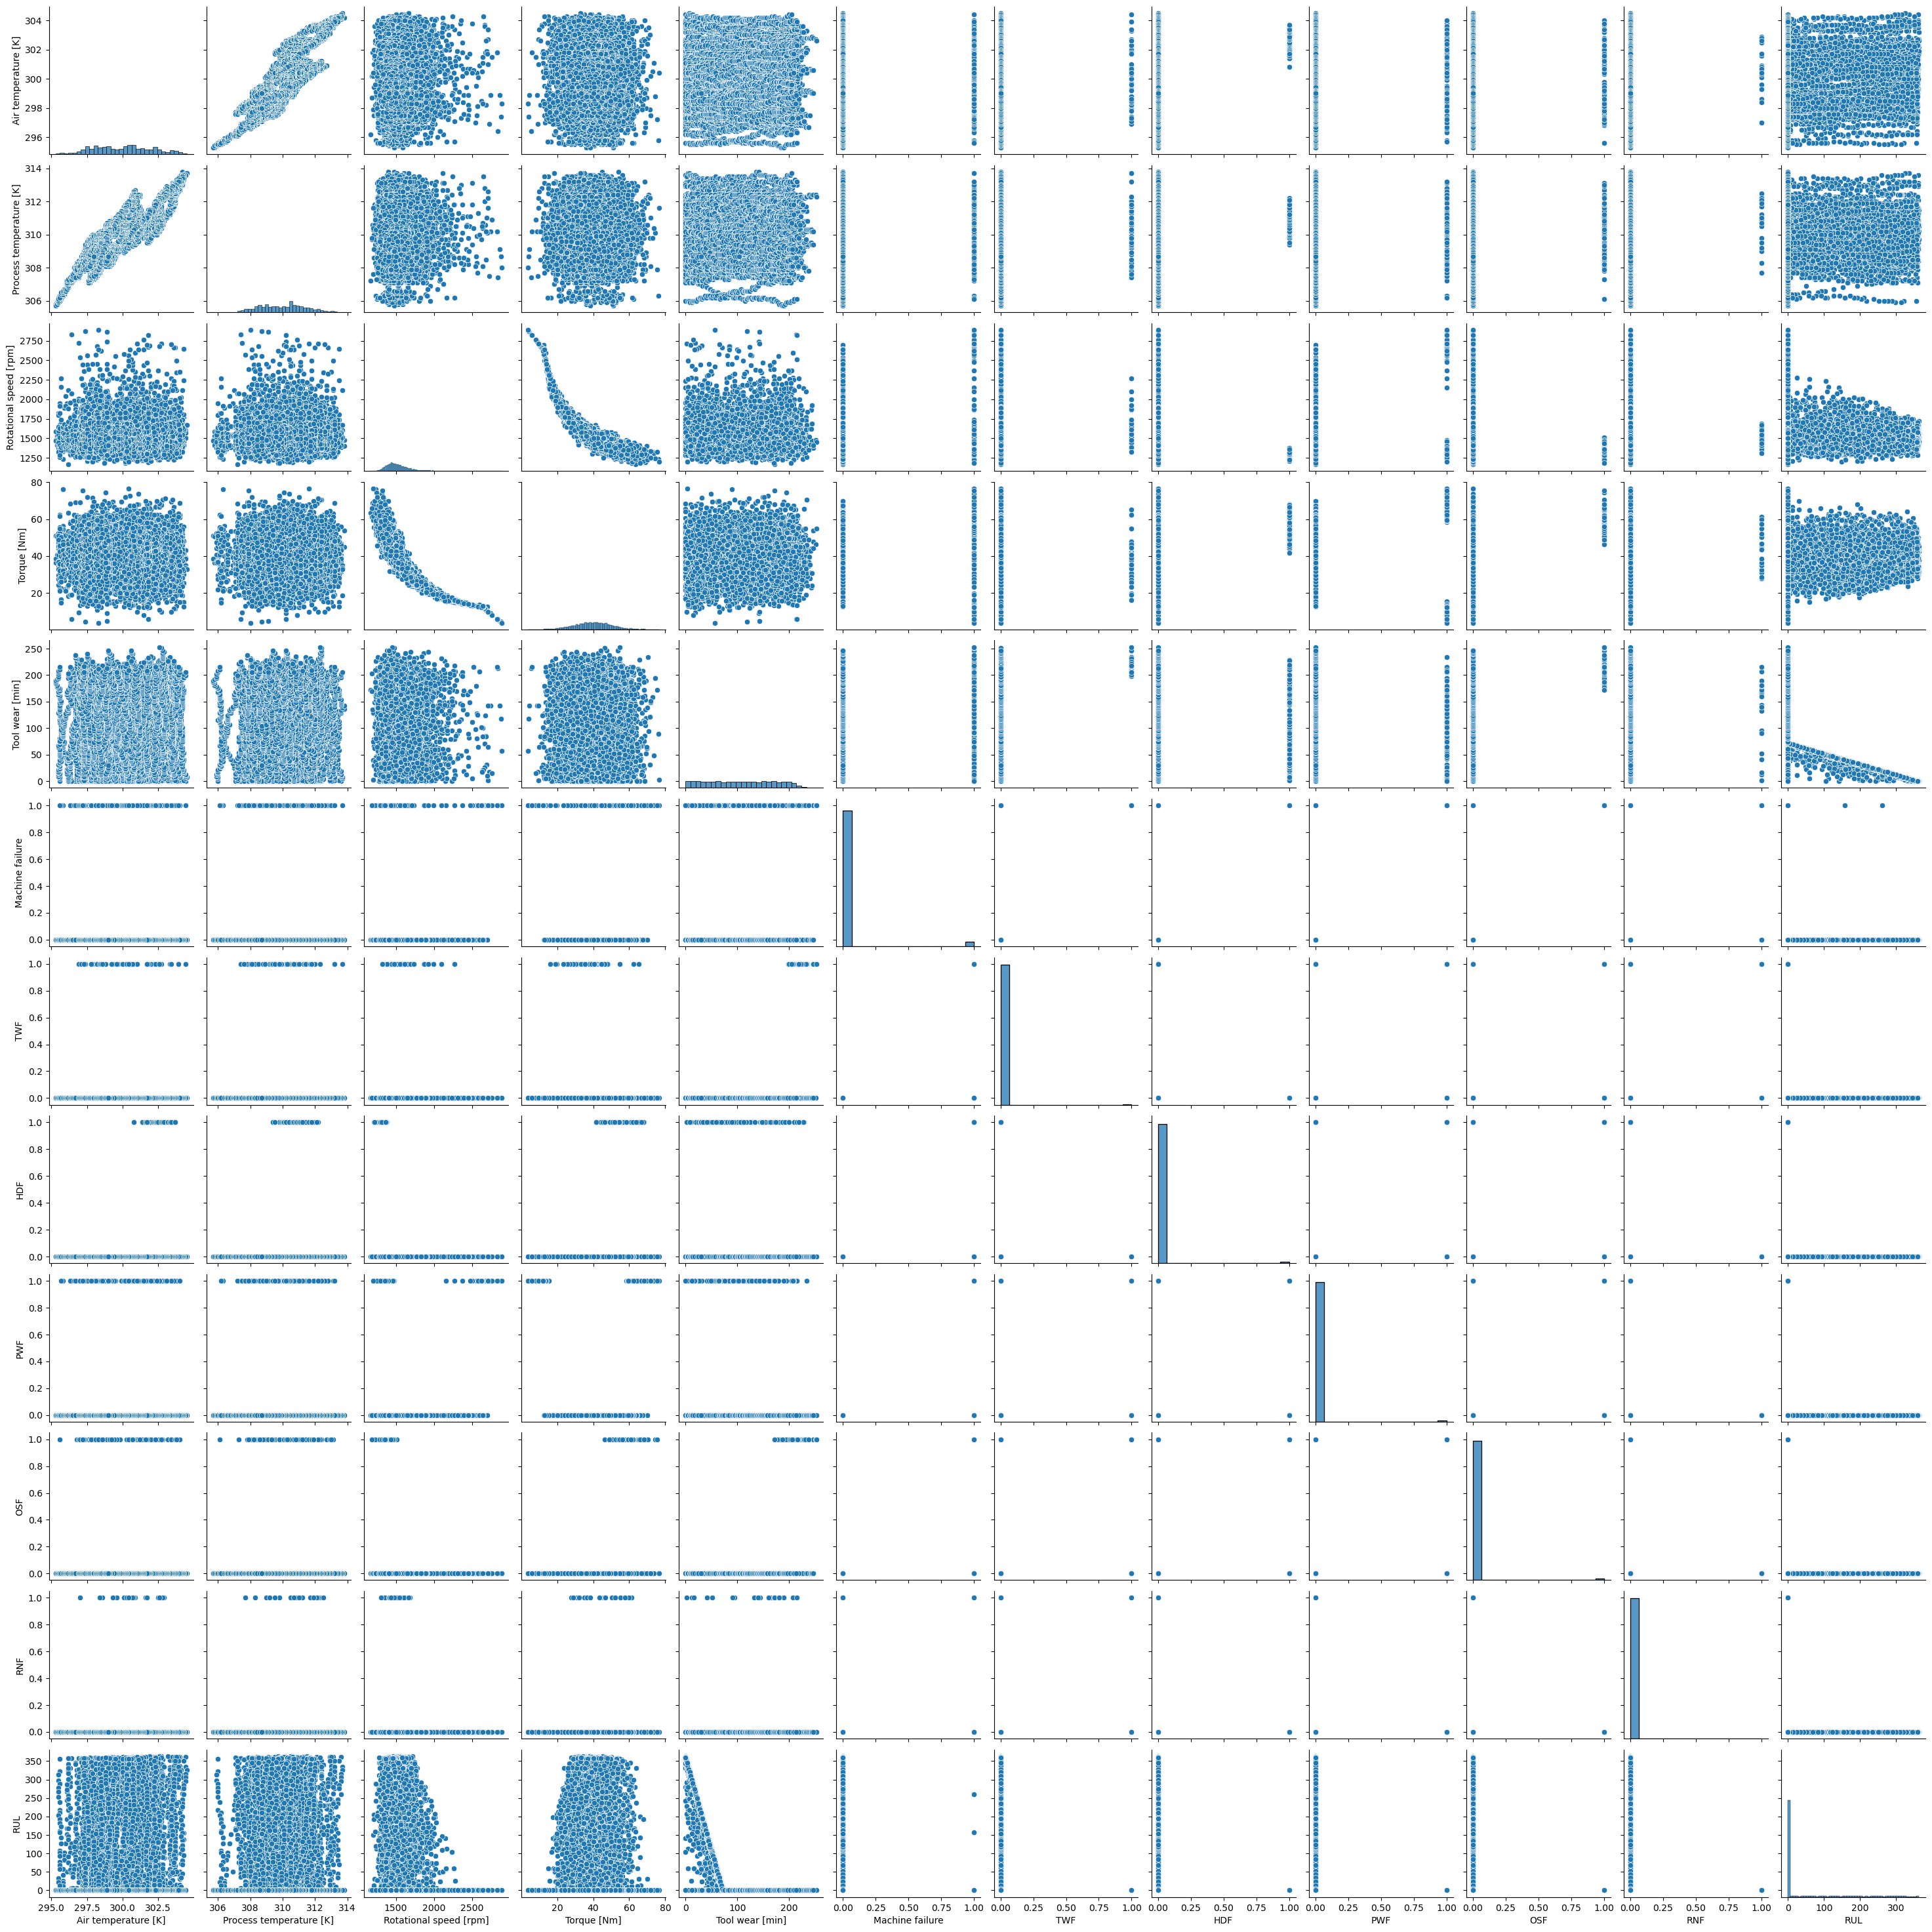

In [36]:
sb.pairplot(data[numeric_list+ ['RUL']])
plt.show()

In [ ]:
for i in categoric_list:
    sb.boxplot(x = i, y = 'RUL',data=data)
    plt.show()

In [29]:
ohe = OneHotEncoder(handle_unknown = "ignore" )
scaler = Sta ndardScaler()


In [28]:
new_data = ColumnTransformer(transformers=[
    ('categorical',Pipeline([
        ('imputer',SimpleImputer(strategy ='most_frequent')),
        ('encoder',ohe)]),
        categoric_list
    ),
    
    ('numeric',Pipeline([
        ('imputer',SimpleImputer()),
        ('scaler',scaler)]),
        numeric_list
    )
])

In [12]:
new_data

,transformers,"[('categorical', ...), ('numceric', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


Main Pipeline 
------------------------------------------------------------------------------------------------------------------------------

In [31]:
model = XGBRegressor()

#Parameters can be used :

# i. tree_method ='hist'    ---->

In [32]:
pipe = Pipeline([
    ('data',new_data),
    ('model',model)
])

In [21]:
model_2= LGBMRegressor()

In [23]:
pipe_2 = Pipeline([
    ('data',new_data),
    ('model',model_2)
])

In [33]:
start_xgb =time.time()
pipe.fit(X_train,y_train)
end_xgb = time.time()
xgb_time = end_xgb - start_xgb
pipe


,steps,"[('data', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical', ...), ('numeric', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
start_lgbm= time.time()
pipe_2.fit(X_train,y_train)
end_lgbm = time.time()
lgbm_time = end_lgbm - start_lgbm
pipe_2

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1432
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 716
[LightGBM] [Info] Start training from score 0.001625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,steps,"[('data', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical', ...), ('numceric', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
y_pred = pipe.predict(X_test)
y_pred

array([4.6285948e-07, 4.6285948e-07, 4.6285948e-07, ..., 4.6285948e-07,
       4.6285948e-07, 4.6285948e-07], dtype=float32)

In [28]:
y_pred_2 = pipe_2.predict(X_test)
y_pred_2

C:\Users\rajka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


array([-0.00031766, -0.00031766, -0.00031766, ..., -0.00031766,
       -0.00031766, -0.00031766])

FROM XGboost
------------------------------------------------------------------------------------------------------------------------------

In [35]:
train_accuracy = pipe.score(X_train,y_train)
test_accuracy = pipe.score(X_test,y_test)

print('train accuracy:',train_accuracy * 100,'%')
print('test accuracy:',test_accuracy * 100,'%')

train accuracy: 99.99999403953552 %
test accuracy: 99.99999403953552 %


From LGBM 
------------------------------------------------------------------------------------------------------------------------------

In [39]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae =mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
print("mean squared error from xgboost",mse)
print("Root mean squared error from xgboost",rmse)
print("mean absolute error from xgboost",mae)

mean squared error from xgboost 2.428188761172123e-10
Root mean squared error from xgboost 1.5582647392875515e-05
mean absolute error from xgboost 1.3145922821422573e-06


In [31]:
train_accuracy = pipe_2.score(X_train,y_train)
test_accuracy = pipe_2.score(X_test,y_test)

print('train accuracy:',train_accuracy * 100,'%')
print('test accuracy:',test_accuracy * 100,'%')

train accuracy: 32.752971454969405 %
test accuracy: -2.6624499028190973 %


C:\Users\rajka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\rajka\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


#check time
------------------------------------------------------------------------------------------------------------------------------

In [19]:
print("time to train XGBOOST: ",xgb_time)
#print("time to train lgbm :", lgbm_time)

time to train XGBOOST:  0.44211864471435547


In [20]:
import pickle

pickle.dump(pipe,open('predictive_maintain_regressor.pkl','wb'))
